In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("./lichess-sampled.parquet")
df.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04


# ECO Volume Split

In [3]:
df["ECO_Volume"] = df.ECO.apply(lambda x: x[0])

In [4]:
df.ECO_Volume.value_counts()

C    1829659
B    1060188
A     767741
D     562145
E      56457
?      10219
Name: ECO_Volume, dtype: int64

## How the game ends 

In [5]:
pd.crosstab(df.Termination, df.ECO_Volume, normalize="columns").round(6)

ECO_Volume,?,A,B,C,D,E
Termination,,,,,,
Abandoned,0.709952,0.002783,0.003534,0.000092,0.000094,0.000159
Normal,0.112340,0.851519,0.858585,0.863862,0.862886,0.872664
Rules infraction,0.000000,0.000274,0.000314,0.000333,0.000297,0.000567
Time forfeit,0.177610,0.145424,0.137565,0.135713,0.136723,0.126610
Unterminated,0.000098,0.000000,0.000001,0.000000,0.000000,0.000000


Most "?" games are abandonend or time forfeited, implying that they might have been ended before the opening could be determined.

<AxesSubplot:xlabel='Termination'>

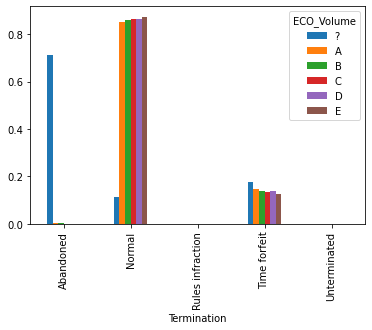

In [6]:
pd.crosstab(df.Termination, df.ECO_Volume, normalize="columns").plot.bar()

Most games end through a time forfeit or normally, as expected. Later-volumed ECOs are slightly more likely to terminate normally than by time, though not to a significant degree

In [7]:
pd.crosstab(df.Result, df.ECO_Volume, normalize="columns").round(6)

ECO_Volume,?,A,B,C,D,E
Result,,,,,,
Black,0.911733,0.474371,0.466712,0.447702,0.444947,0.460598
Draw,0.000098,0.045278,0.043825,0.041699,0.046814,0.055635
Unknown,0.051277,0.000287,0.000307,0.000091,0.000094,0.000124
White,0.036892,0.480064,0.489156,0.510508,0.508145,0.483642


<AxesSubplot:xlabel='Result'>

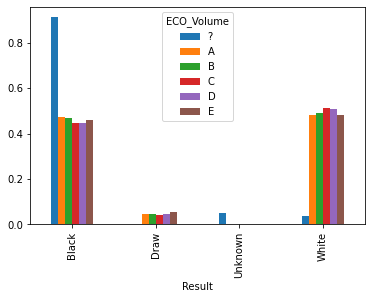

In [8]:
pd.crosstab(df.Result, df.ECO_Volume, normalize="columns").plot.bar()

? games tend to go to Black or be marked as unknown, supporting the earlier theory. Let's remove it from the graph to make any trend more clear.

<AxesSubplot:xlabel='Result'>

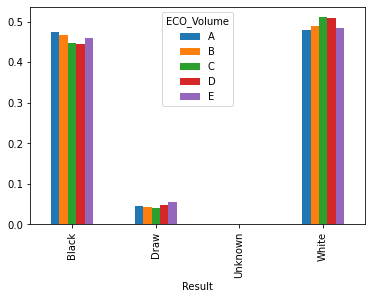

In [9]:
pd.crosstab(df.Result, df.ECO_Volume, normalize="columns")[["A", "B", "C", "D", "E"]].plot.bar()

In general, E volume openings favor draws the most (but they are still infrequent), and C/D volume openings favor white the most. Let's take a look at the comparisons without draws/unknown taken into account so that the odds of victory are more clear.

In [10]:
victories_only = df[(df.Result == "Black") | (df.Result == "White")][["Result", "ECO_Volume"]]

<AxesSubplot:xlabel='ECO_Volume'>

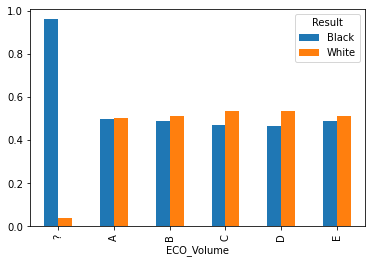

In [11]:
pd.crosstab(victories_only.ECO_Volume, victories_only.Result, normalize="index").plot.bar()

The game is in white's favor, which matches with general opinion on chess. C and D are the best openings for them to be playing, in terms of likelihood to win. ? games fall in black's favor for the same reasons as above. Black has its best odds with A and E openings.

In [12]:
pd.crosstab(pd.qcut(df.WhiteElo, q=10), df.ECO_Volume, normalize="index")

ECO_Volume,?,A,B,C,D,E
WhiteElo,,,,,,
"(599.999, 1212.0]",0.002451,0.219081,0.206097,0.452649,0.116816,0.002906
"(1212.0, 1336.0]",0.002204,0.182164,0.218177,0.470492,0.123167,0.003795
"(1336.0, 1426.0]",0.002074,0.169765,0.224031,0.472092,0.126855,0.005184
"(1426.0, 1500.0]",0.002658,0.176385,0.226202,0.457750,0.129932,0.007073
"(1500.0, 1560.0]",0.002071,0.163149,0.237130,0.459409,0.129410,0.008830
"(1560.0, 1630.0]",0.002184,0.164224,0.246762,0.445787,0.130427,0.010617
"(1630.0, 1702.0]",0.002303,0.166931,0.257151,0.427232,0.132786,0.013598
"(1702.0, 1783.0]",0.002310,0.171902,0.269359,0.401894,0.136684,0.017851
"(1783.0, 1893.0]",0.002558,0.179433,0.285795,0.368914,0.138986,0.024313


<AxesSubplot:xlabel='WhiteElo'>

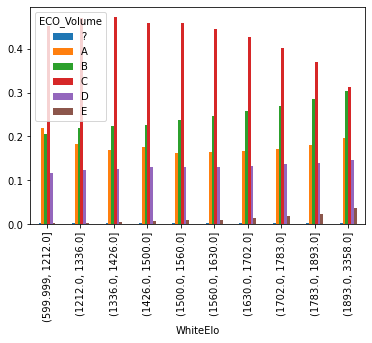

In [13]:
pd.crosstab(pd.qcut(df.WhiteElo, q=10), df.ECO_Volume, normalize="index").plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<AxesSubplot:xlabel='BlackElo'>

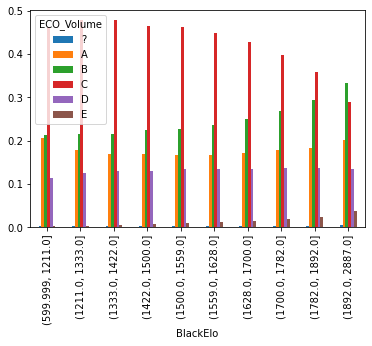

In [14]:
pd.crosstab(pd.qcut(df.BlackElo, q=10), df.ECO_Volume, normalize="index").plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

C openings are by far the most common, but fall in popularity in higher elos. Better black players tend to play in games that have more B openings than better white players. This implies that better black players tend to force Semi-Open games as opposed to playing Open Games (since the choice of playing one or the other is the Black player's after White plays e4).

## A different Categorization Method

In [15]:
def get_opening_type(opening):
    if(opening[0] == "A" and int(opening[1:]) not in range(53,56)):
        return "Flank Opening"
    if(opening[0] == "B" or opening[0] == "C" and int(opening[1:]) <= 19):
        return "Semi-Open Game"
    if(opening[0] == "C"):
        return "Open Game" #already covered edge case with French Defense
    if(opening[0] == "D" and int(opening[1:]) < 70):
        return "Closed or Semi-Closed Game"
    if((opening[0] == "D" and int(opening[1:]) >= 70) or opening[0] == "E" or (opening[0] == "A" and int(opening[1:])  in range(53,56))):
        return "Indian Defense"
    return "Unknown"

In [16]:
df["Opening_Category"] = df.ECO.apply(get_opening_type).astype("category")
df.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date,ECO_Volume,Opening_Category
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12,D,Closed or Semi-Closed Game
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00,C,Semi-Open Game
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04,C,Open Game


<AxesSubplot:xlabel='Termination'>

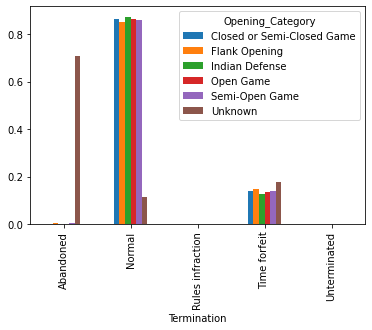

In [17]:
pd.crosstab(df.Termination, df.Opening_Category, normalize="columns").plot.bar()

Similar to as seen with categorization by volume.

In [20]:
pd.crosstab(df.Result, df.Opening_Category, normalize="columns").round(6)

Opening_Category,Closed or Semi-Closed Game,Flank Opening,Indian Defense,Open Game,Semi-Open Game,Unknown
Result,,,,,,
Black,0.444577,0.474560,0.460781,0.443214,0.467848,0.911733
Draw,0.046568,0.045268,0.056218,0.041227,0.043918,0.000098
Unknown,0.000095,0.000288,0.000104,0.000080,0.000275,0.051277
White,0.508760,0.479884,0.482898,0.515479,0.487958,0.036892


<AxesSubplot:xlabel='Result'>

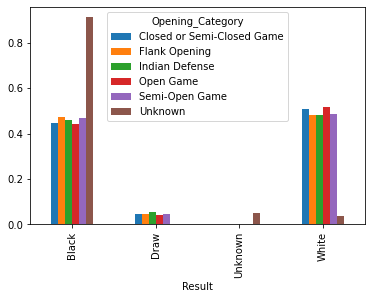

In [21]:
pd.crosstab(df.Result, df.Opening_Category, normalize="columns").plot.bar()

In [22]:
victories_only = df[(df.Result == "Black") | (df.Result == "White")][["Result", "Opening_Category"]]

<AxesSubplot:xlabel='Opening_Category'>

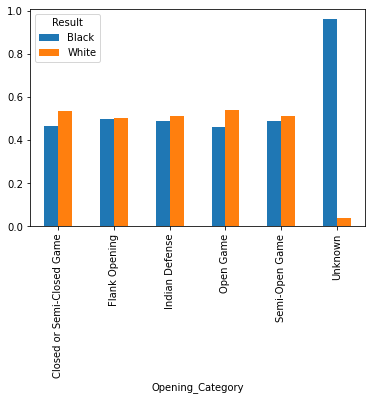

In [23]:
pd.crosstab(victories_only.Opening_Category, victories_only.Result, normalize="index").plot.bar()

Flank openings, roughly corresponding to volume A, are the best for Black. e4 is a strong pick for a first move for white, since it leads to Closed/Semi-Closed or Open Games. Overall, little difference from the ECO volumes.

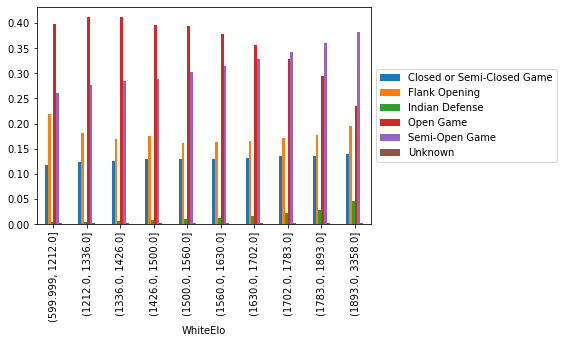

In [25]:
pd.crosstab(pd.qcut(df.WhiteElo, q=10), df.Opening_Category, normalize="index").plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

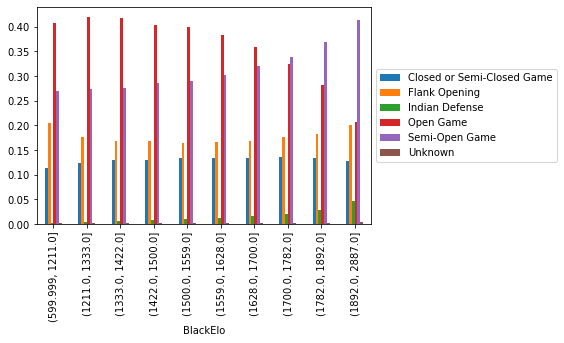

In [26]:
pd.crosstab(pd.qcut(df.BlackElo, q=10), df.Opening_Category, normalize="index").plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Higher ranked Black players usually pick Semi-Open games over Open Games, which is consistent with the Volumes. Having the French Defense represented in the Semi-Open category instead of C shows that the decision is much more skewed, with Black most frequently not mirroring White's e4.